In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("all-data.csv", encoding="ISO-8859-1")
df


,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [14]:
df.columns = ['Sentiment', 'News']
df['Sentiment'].value_counts()


Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [16]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation/numbers
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

df['Cleaned_News'] = df['News'].apply(clean_text)
df[['News', 'Cleaned_News']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ry661\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,News,Cleaned_News
0,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less squ...
1,The international electronic industry company ...,international electronic industry company elco...
2,With the new production plant the company woul...,new production plant company would increase ca...
3,According to the company 's updated strategy f...,according company updated strategy years baswa...
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp growth aspocomp aggressivel...


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sentiment_Label'] = le.fit_transform(df['Sentiment'])  # 0=negative, 1=neutral, 2=positive
df[['Sentiment', 'Sentiment_Label']].head()

,Sentiment,Sentiment_Label
0,neutral,1
1,negative,0
2,positive,2
3,positive,2
4,positive,2


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # limit to top 5000 features
X = tfidf.fit_transform(df['Cleaned_News']).toarray()
y = df['Sentiment_Label']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 51  58  12]
 [  5 551  20]
 [ 12 138 122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54       121
           1       0.74      0.96      0.83       576
           2       0.79      0.45      0.57       272

    accuracy                           0.75       969
   macro avg       0.76      0.61      0.65       969
weighted avg       0.75      0.75      0.72       969


Accuracy Score: 0.7471620227038184


In [30]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb))

Confusion Matrix:
 [[ 52  53  16]
 [  7 529  40]
 [ 16 124 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.43      0.53       121
           1       0.75      0.92      0.83       576
           2       0.70      0.49      0.57       272

    accuracy                           0.74       969
   macro avg       0.71      0.61      0.64       969
weighted avg       0.73      0.74      0.72       969


Accuracy Score: 0.7358101135190919


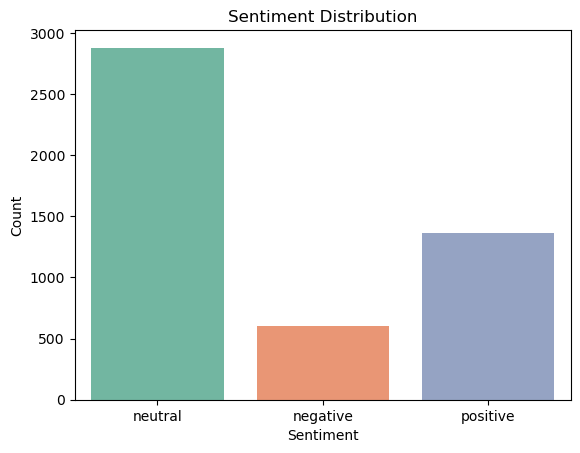

In [32]:
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

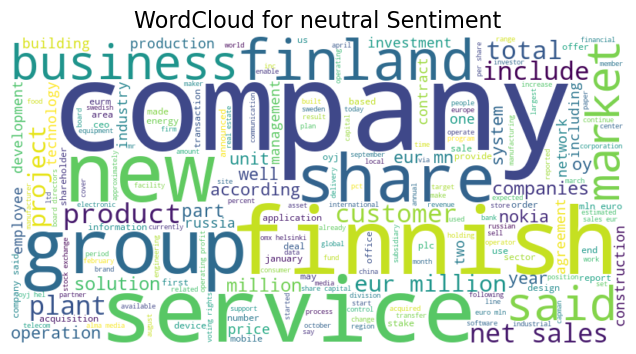

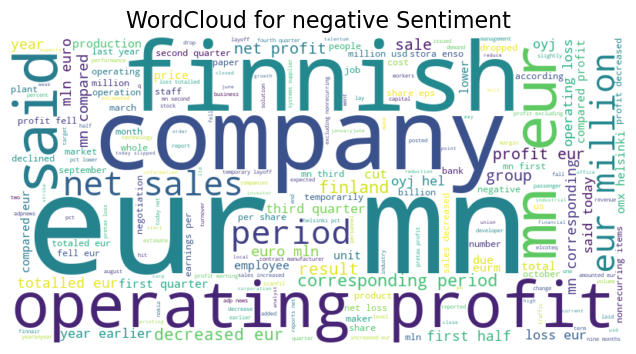

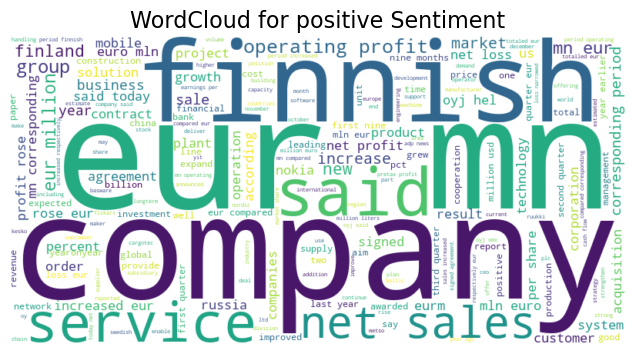

In [42]:
from wordcloud import WordCloud

for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['Cleaned_News'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Sentiment", fontsize=16)
    plt.show()

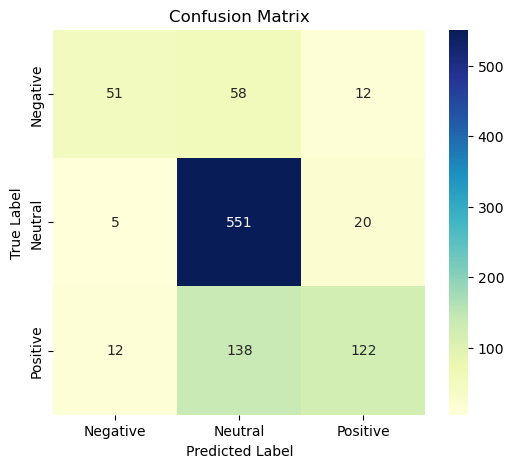

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [55]:
import pickle

with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)